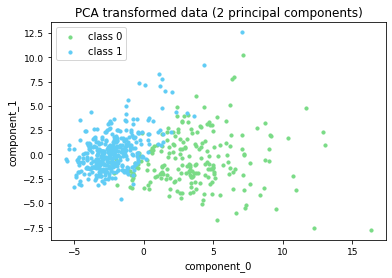

In [10]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
x_data = data.data
y_data = data.target

def pca_own_realization(X, n_components):
    # 1. Standardize the data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # 2. Compute the covariance matrix
    cov_mat = np.cov(X_std, rowvar=False)

    # 3. Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    # 4. Sort the eigenvalues in decreasing order and choose the top k eigenvectors
    idx = np.argsort(eigenvalues)[::-1][:n_components]
    eigenvectors = eigenvectors[:, idx]

    # 5. Project the data onto the top k eigenvectors
    X_pca = np.dot(X_std, eigenvectors)

    # 7. Calculate explained_variance
    explained_variance = eigenvalues / np.sum(eigenvalues)

    return X_pca, explained_variance

x_trans_data, ev = pca_own_realization(x_data, n_components=2)

plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in np.unique(y_data):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(len(pten_cluster_entries_1)):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=np.random.rand(3,),
                       marker='o', label=f'class {cl_inx}')
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()